<a href="https://colab.research.google.com/github/shanzabakhtds/CodSoft/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display

# **Loading Dataset**

In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')


# **Exploring The DataSet**

In [ ]:
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   9

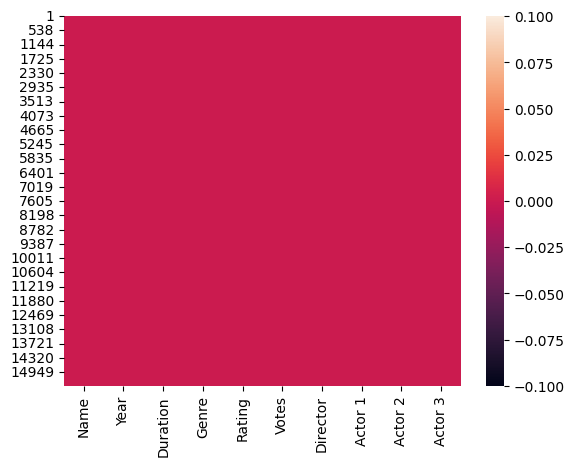

In [ ]:
sns.heatmap(df.isnull());

In [ ]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [ ]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

# **Checking the dimension of the dataset**

In [ ]:
print("Dimensions of the dataset in (rows, columns): ", df.shape)

Dimensions of the dataset in (rows, columns):  (15509, 10)


# **Checking The Coloumn Names in our Dataset**

In [ ]:
print("\n Columns Names are : ")
print("  ")
df.columns


 Columns Names are : 
  


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# **Check the number of values in each column**

In [ ]:

df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

# **Descriptive statistics**

In [ ]:
statistics = df.describe().transpose()
print("\nDescriptive Statistics:")
print(" ")
print(statistics)


Descriptive Statistics:
 
          count         mean        std     min     25%     50%     75%  \
Year    14981.0 -1987.012215  25.416689 -2022.0 -2009.0 -1991.0 -1968.0   
Rating   7919.0     5.841621   1.381777     1.1     4.9     6.0     6.8   

           max  
Year   -1913.0  
Rating    10.0  


In [ ]:
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,11086.000000,11086.000000,11086.000000
mean,5.934882,129.889362,2008.285582
std,1.144159,20.310438,9799.681552
min,1.100000,21.000000,5.000000
50%,6.200000,128.193162,383.000000
75%,6.400000,137.000000,1963.643981
80%,6.700000,141.000000,1963.643981
90%,7.200000,155.000000,1963.643981
95%,7.600000,164.000000,5259.500000
98%,8.100000,175.000000,15529.400000


# **Data Cleaning**

In [ ]:
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)
df["Votes"] = df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',', ''))

# Dropping null values
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

# Replacing Null Values ....
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [ ]:
#Checking Null Values again for confirmation.
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [ ]:
df[df['Votes']>100000]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009.0,170.0,"Comedy, Drama",8.4,357889.0,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016.0,161.0,"Action, Biography, Drama",8.4,165074.0,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,2020.0,101.0,"Comedy, Drama, Romance",6.6,117377.0,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,1982.0,191.0,"Biography, Drama, History",8.0,220118.0,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,2001.0,224.0,"Drama, Musical, Sport",8.1,107234.0,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,2012.0,127.0,"Adventure, Drama, Fantasy",7.9,591417.0,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,2007.0,165.0,"Drama, Family",8.4,175810.0,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,2016.0,118.0,"Biography, Drama",8.0,220526.0,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,2010.0,165.0,Drama,8.0,101014.0,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,2014.0,153.0,"Comedy, Drama, Musical",8.1,168150.0,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


# **Data Visualization**

In [ ]:
def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

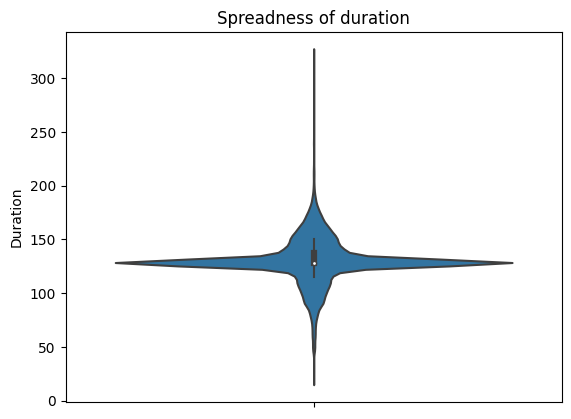

In [ ]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

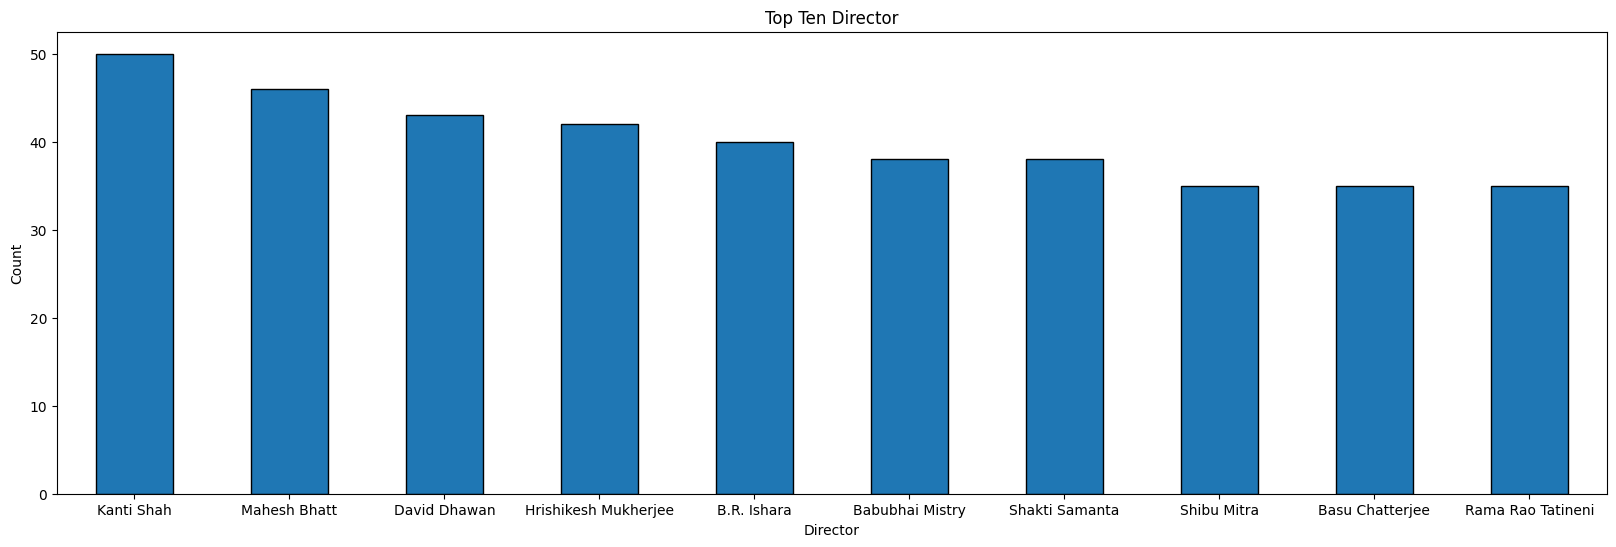

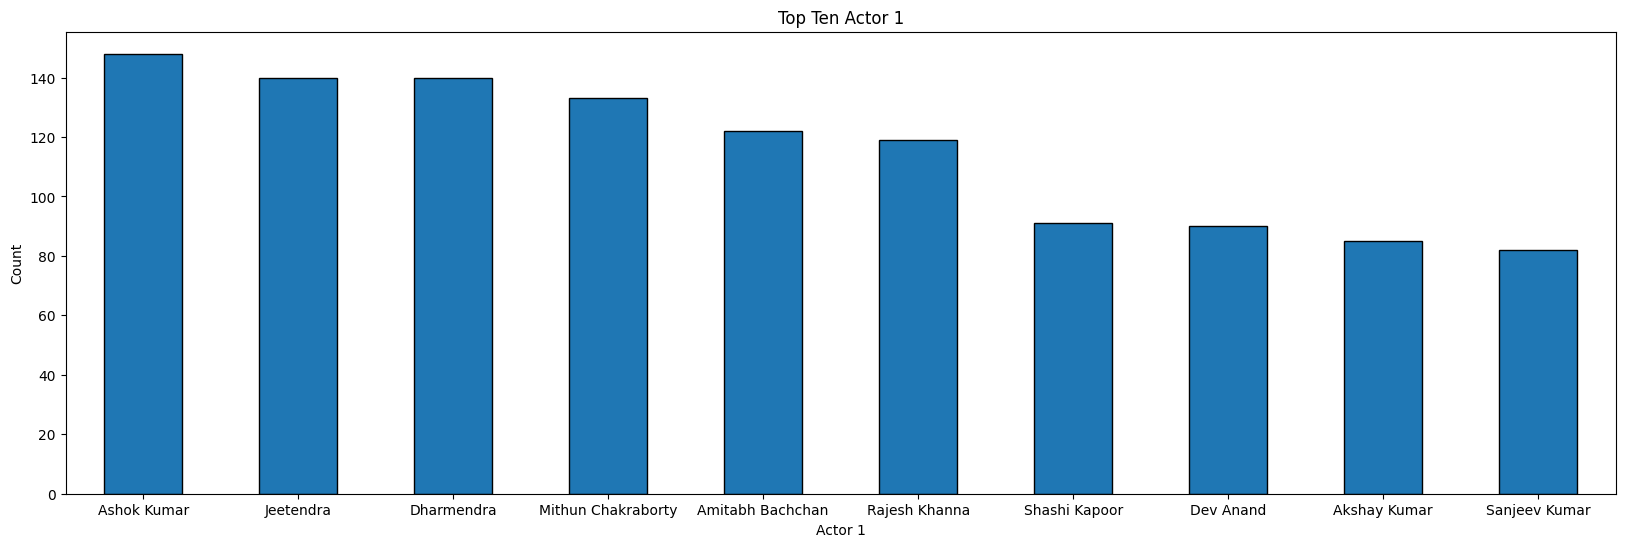

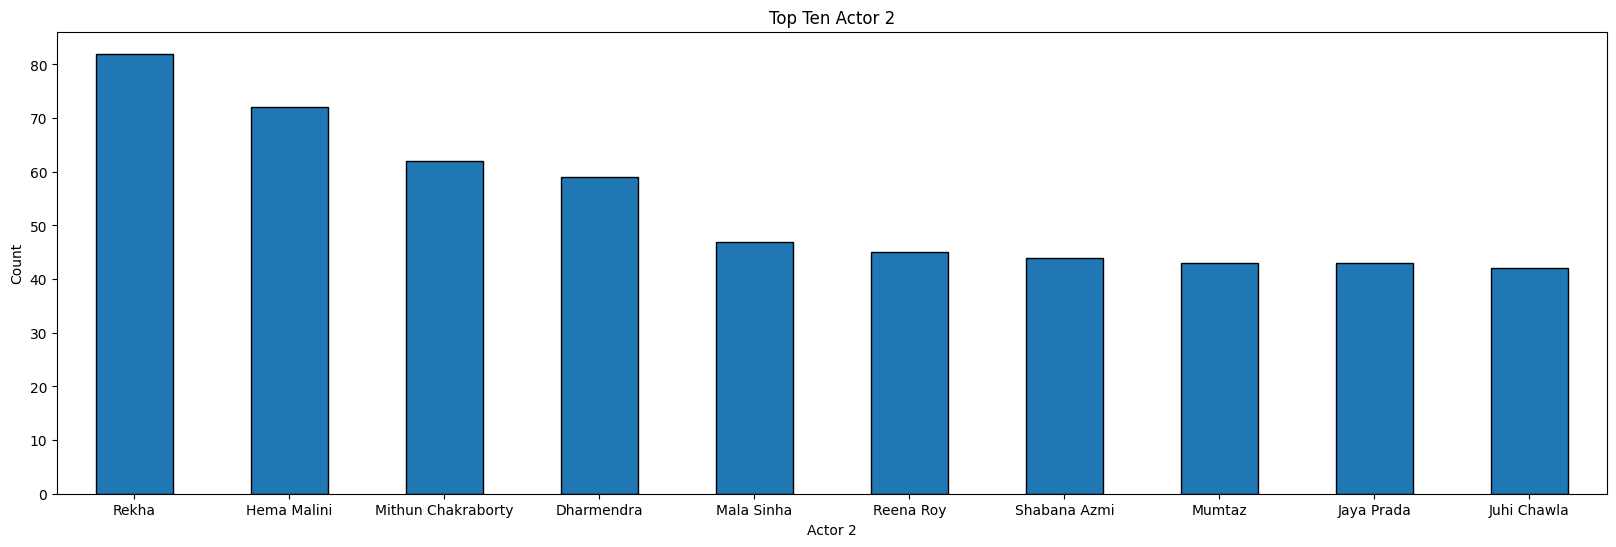

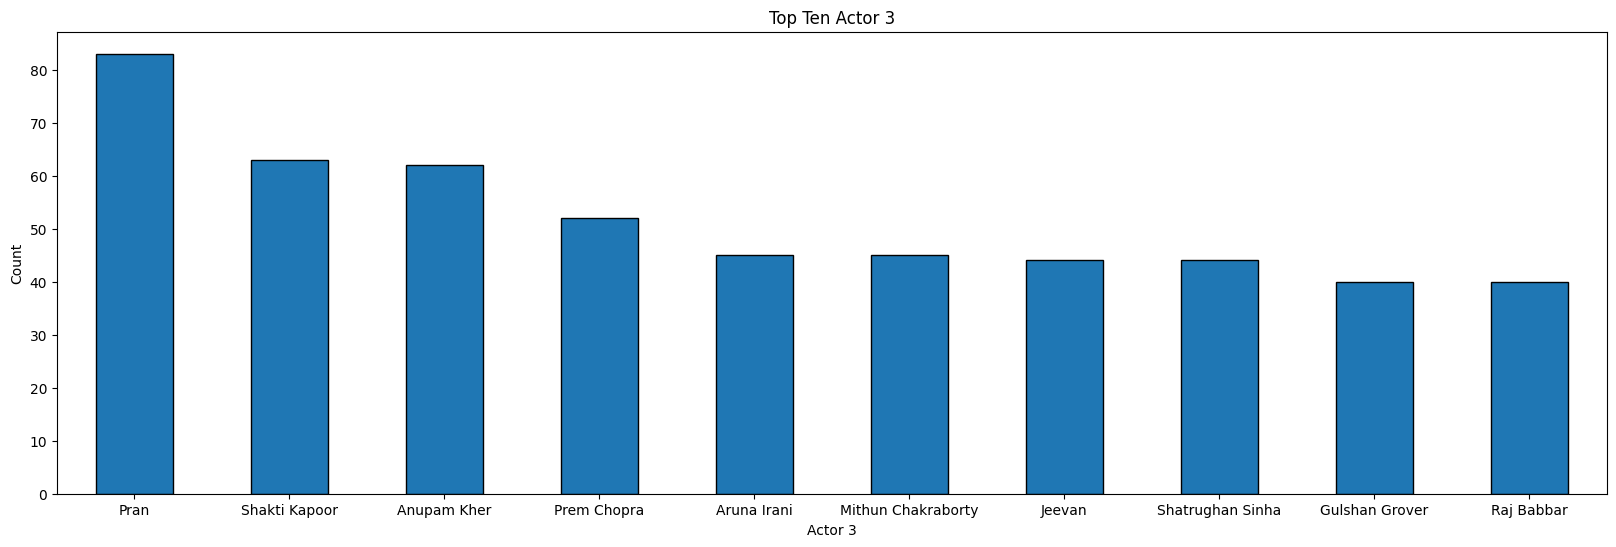

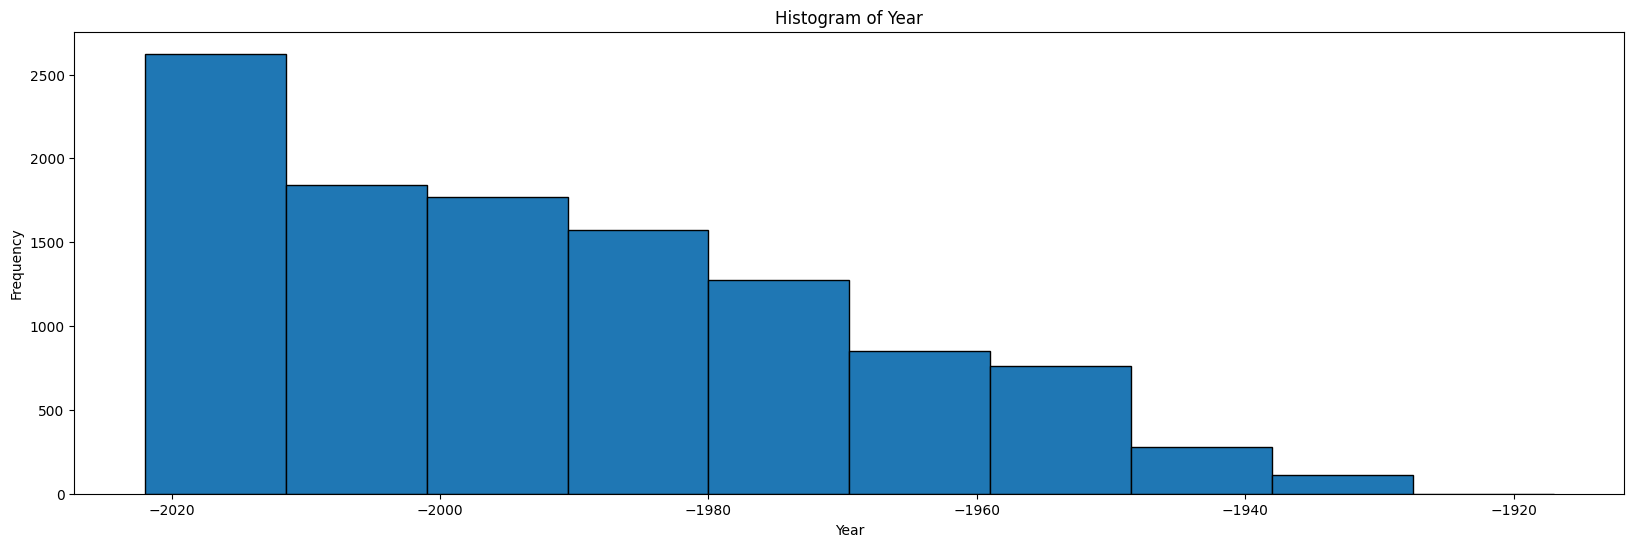

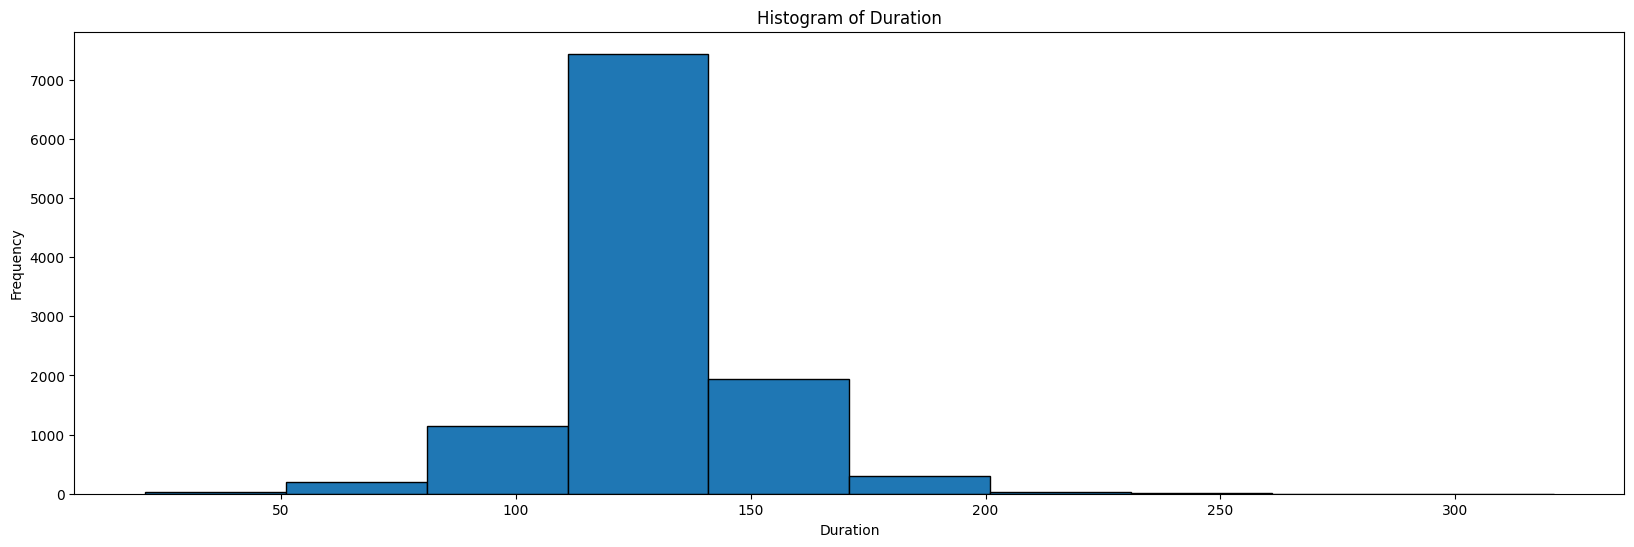

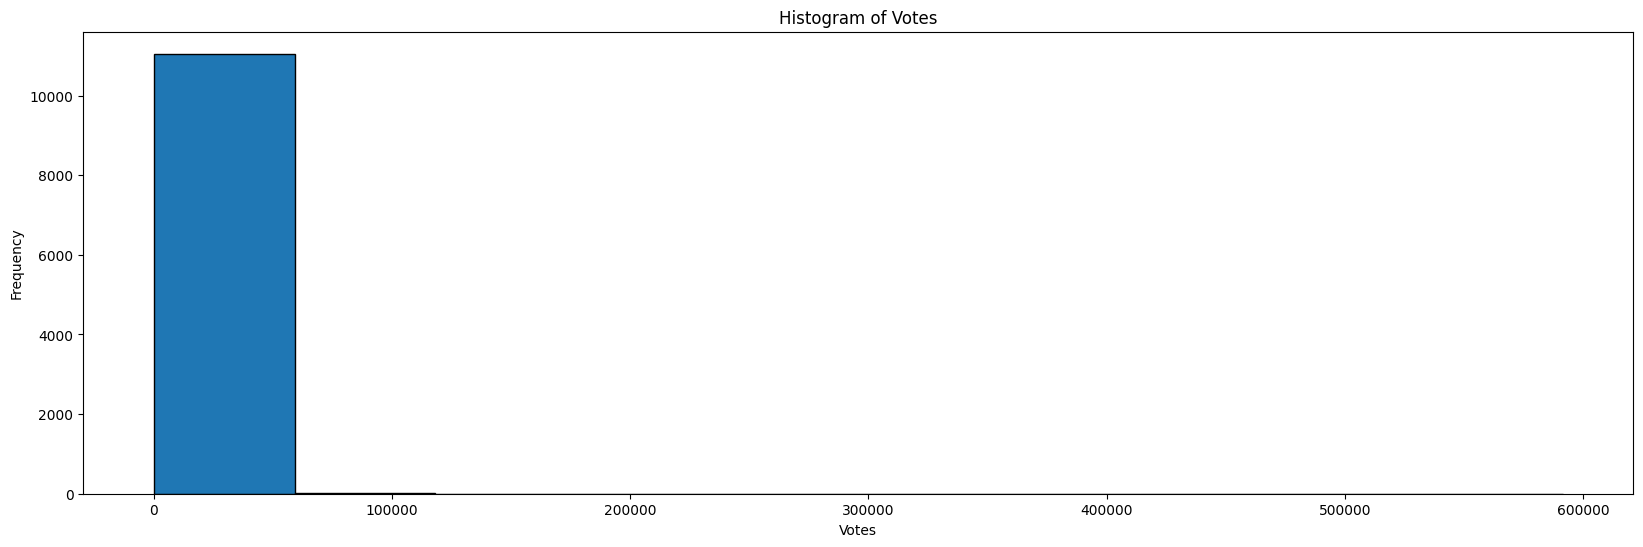

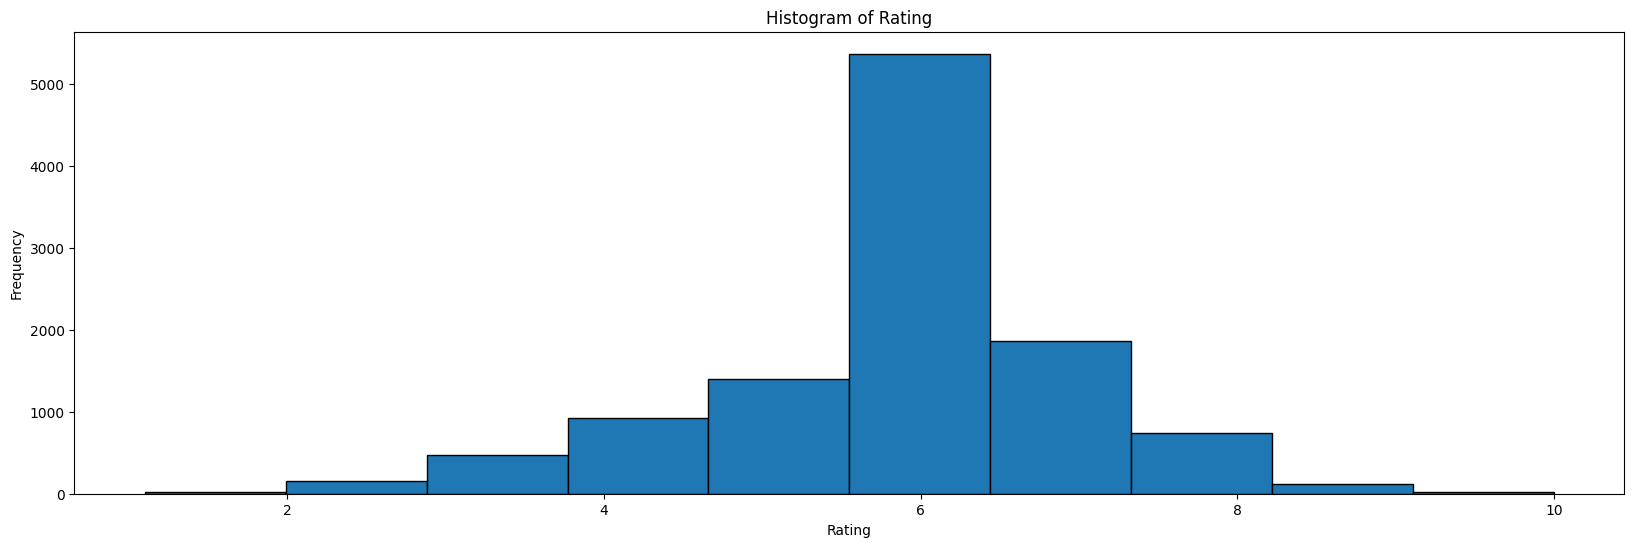

In [ ]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

<ipython-input-43-ddd93c71405b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


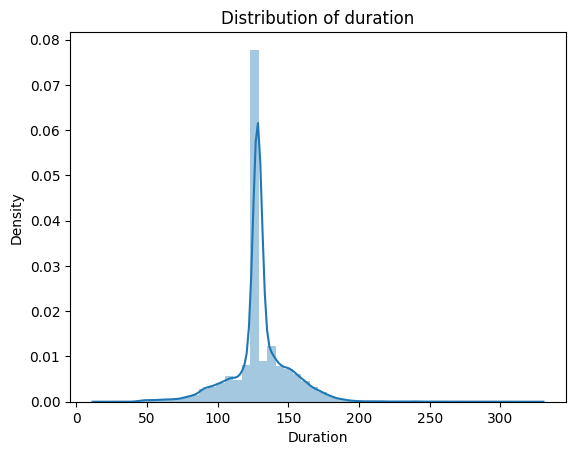

In [ ]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

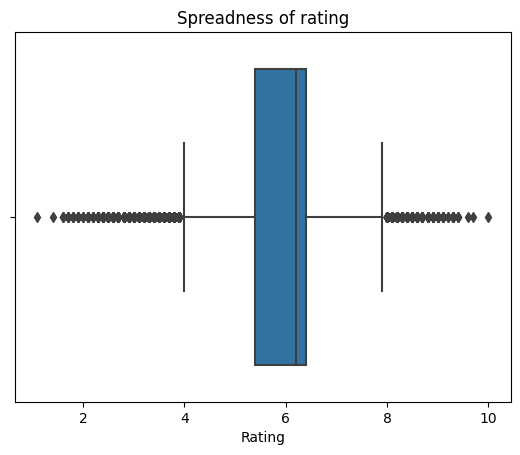

In [ ]:
sns.boxplot(x=df['Rating'])
plt.title('Spreadness of rating')
plt.show()

<ipython-input-45-32fb841ddc43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


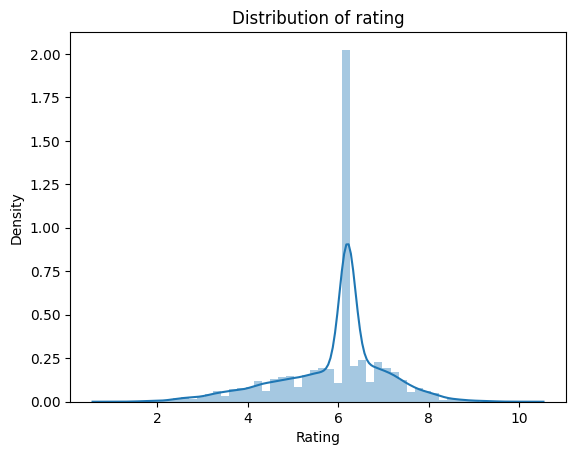

In [ ]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()


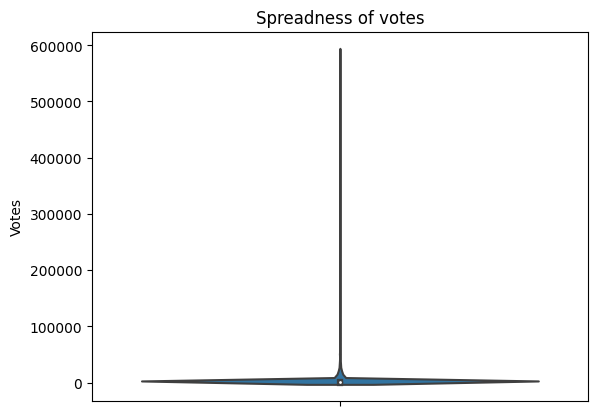

In [ ]:
sns.violinplot(y=df['Votes'])
plt.title('Spreadness of votes')
plt.show()

<ipython-input-47-f1ca6c14df0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Votes'])


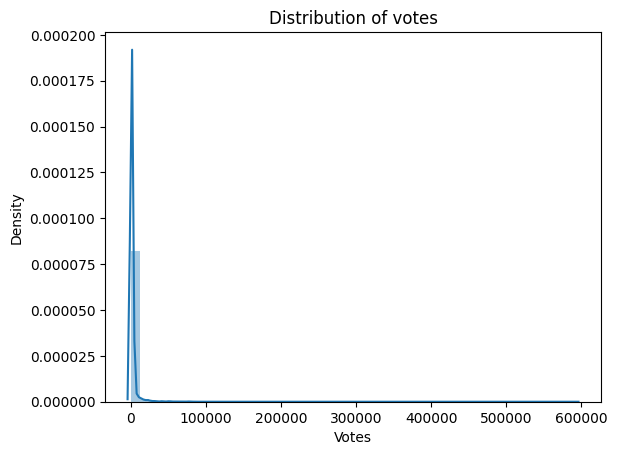

In [ ]:
sns.distplot(df['Votes'])
plt.title('Distribution of votes')
plt.show()

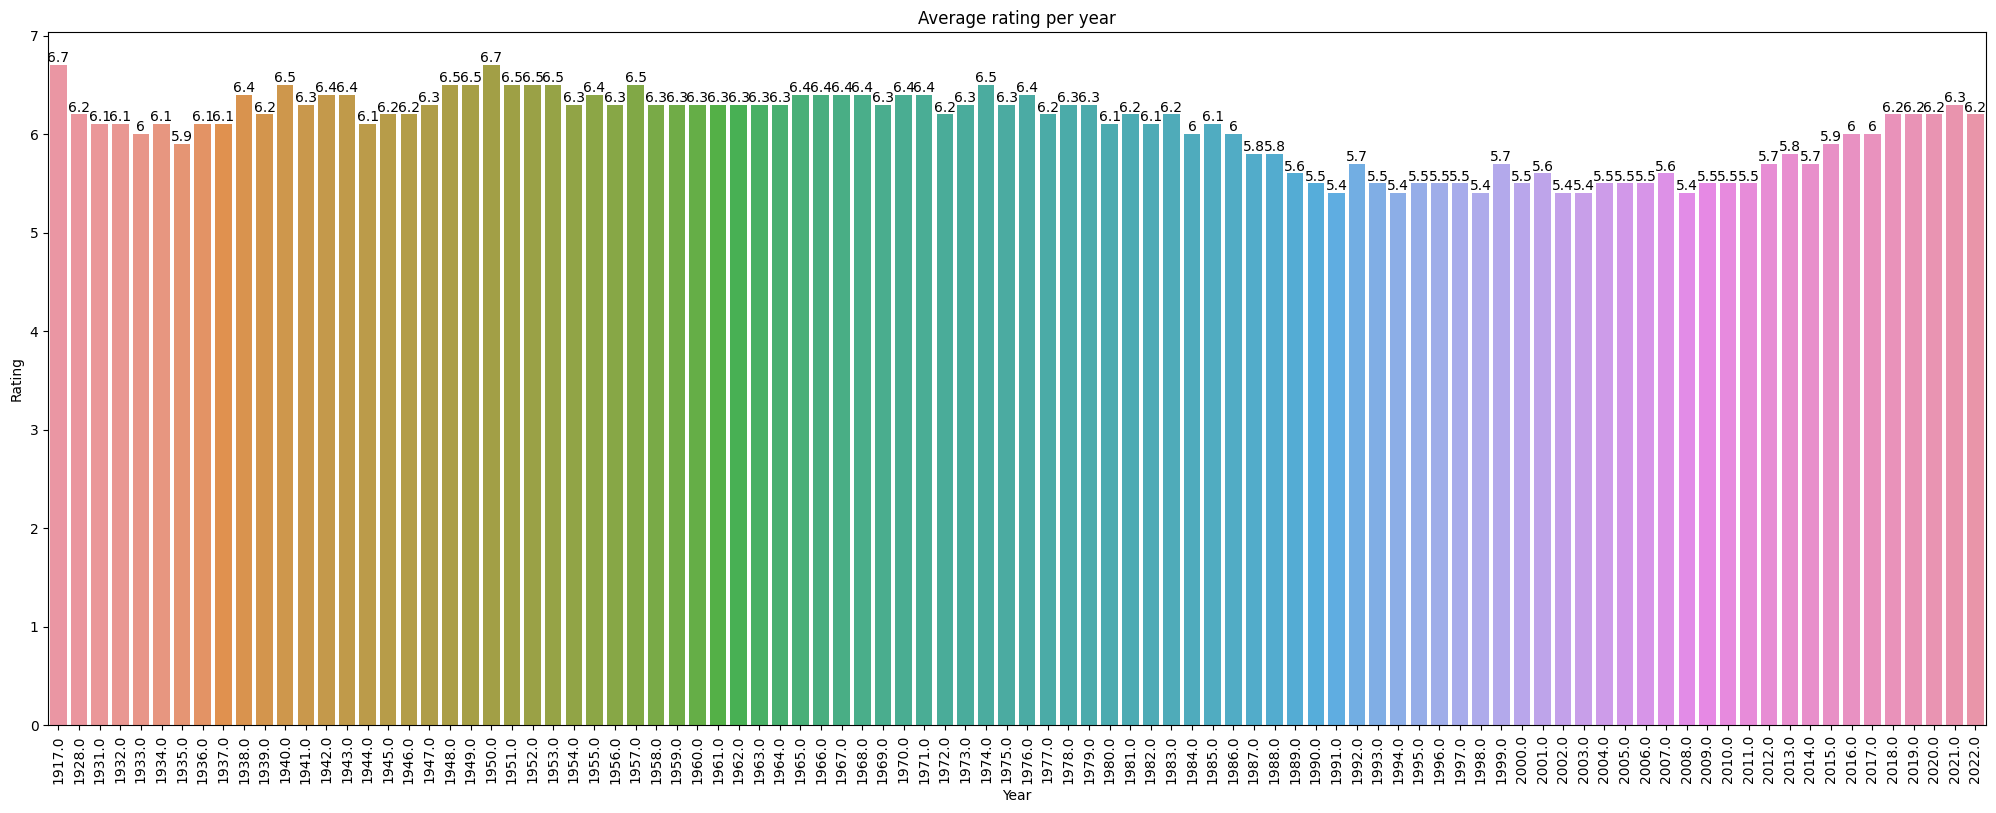

In [ ]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

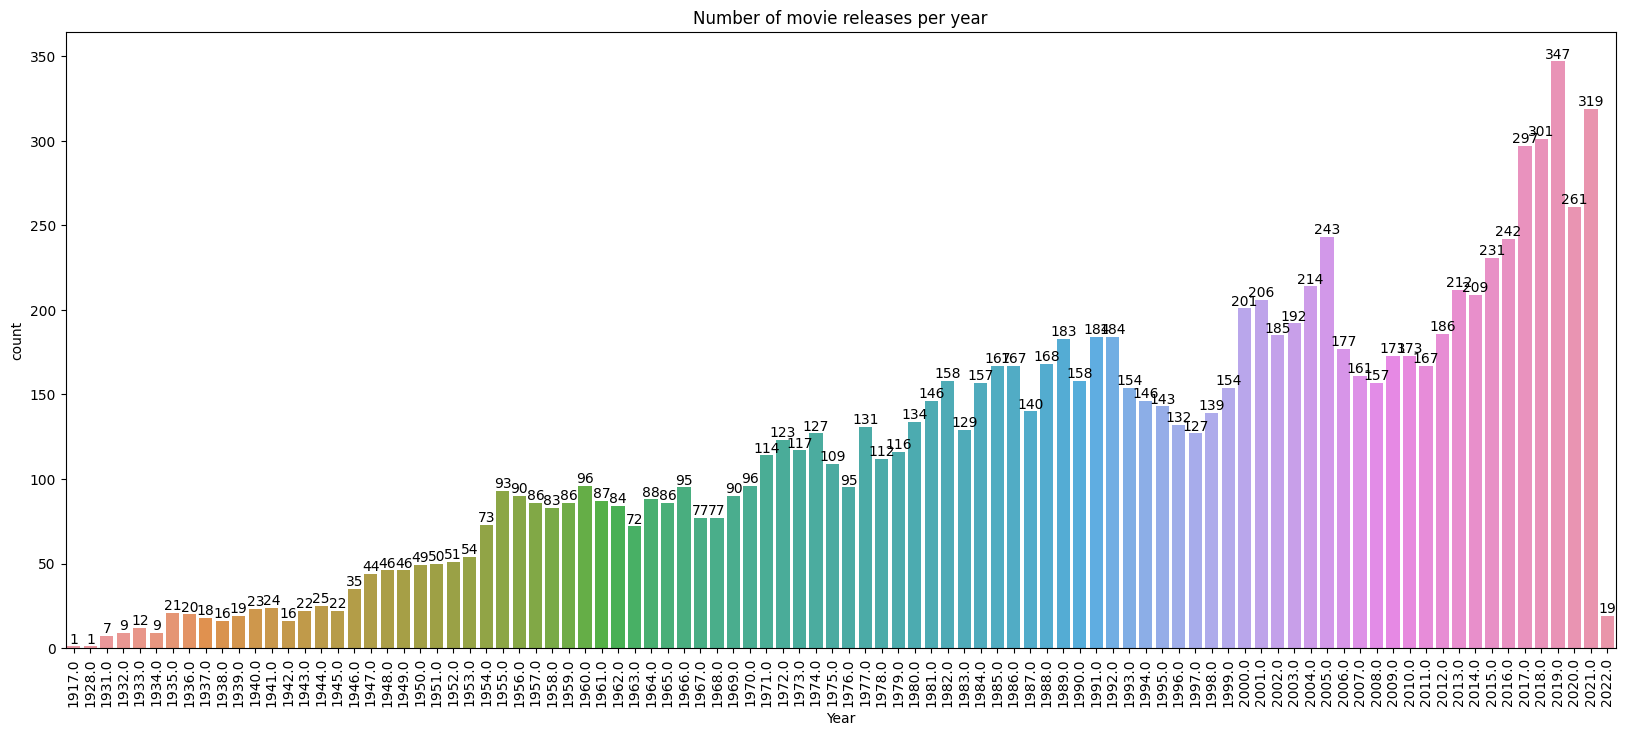

In [ ]:
# Number of movie release per year
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

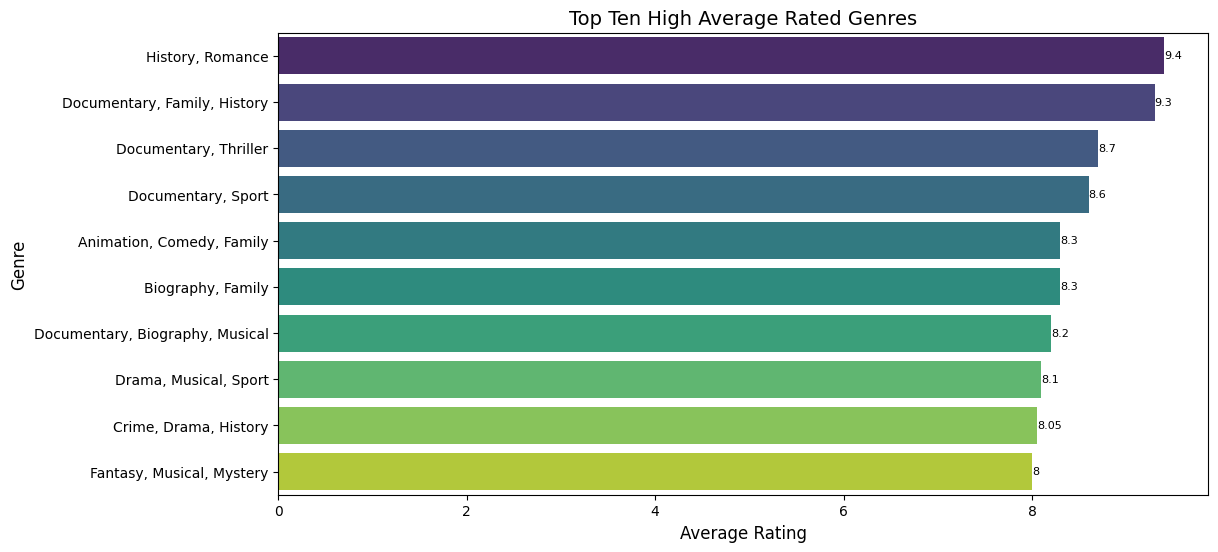

In [ ]:

# Plot top ten high average rated genres
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).reset_index().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='viridis')  # Change the color palette
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Top Ten High Average Rated Genres', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


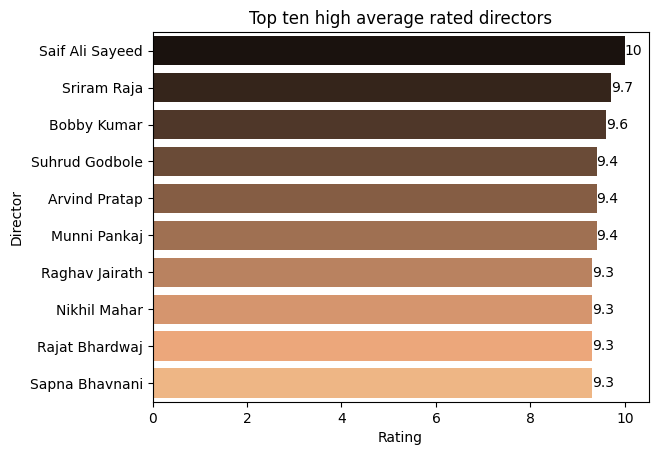

In [ ]:
# plot top ten high average rating directors
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='copper')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

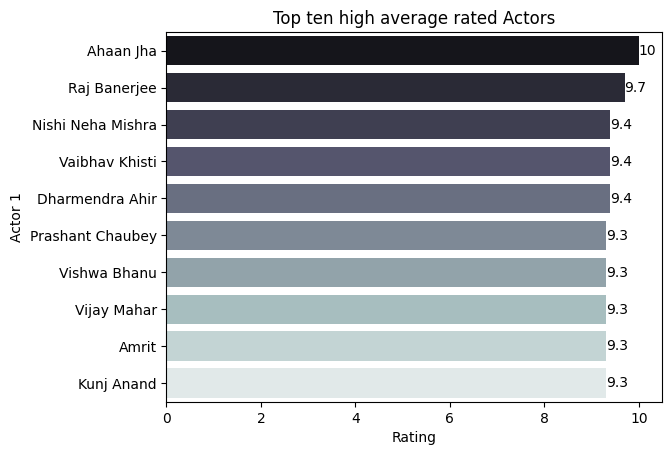

In [ ]:
# plot top ten high average rating actors
actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1', palette='bone')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated Actors')
plt.show()

# **Pair Plots and Correlation Matrix**

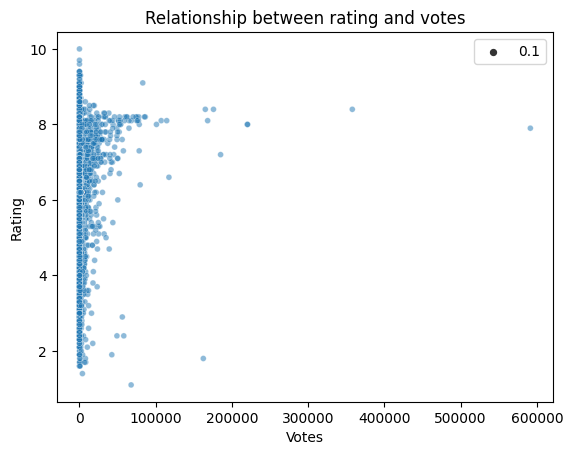

In [ ]:
sns.scatterplot(data=df, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

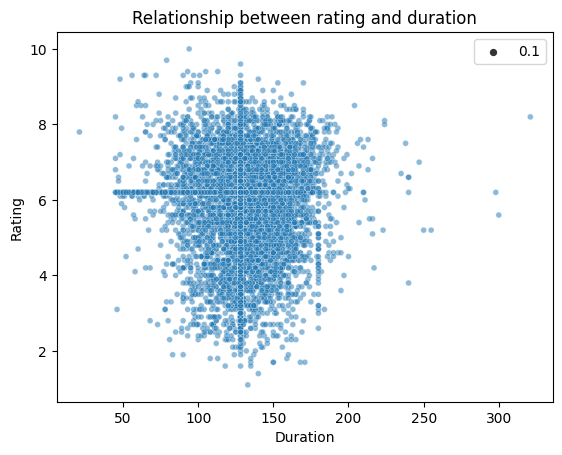

In [ ]:
sns.scatterplot(data=df, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

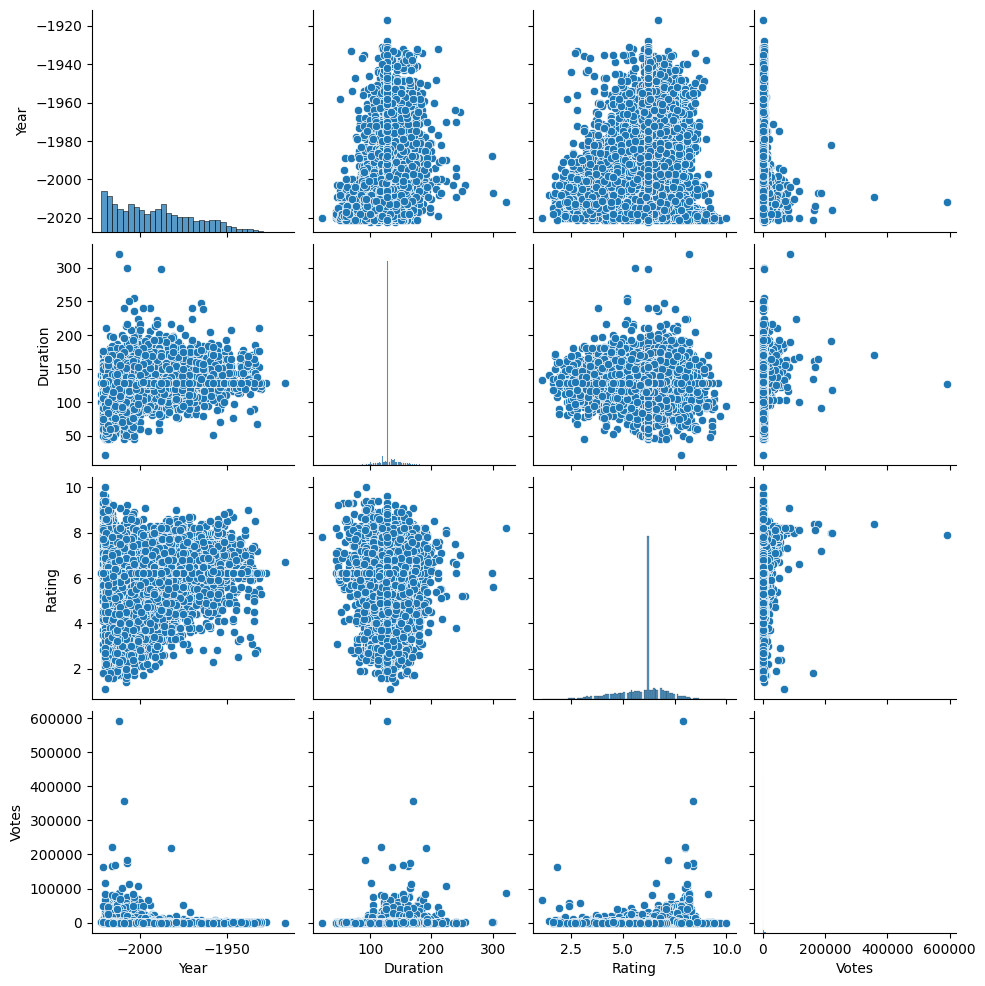

In [ ]:
import seaborn as sns

sns.pairplot(df)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')

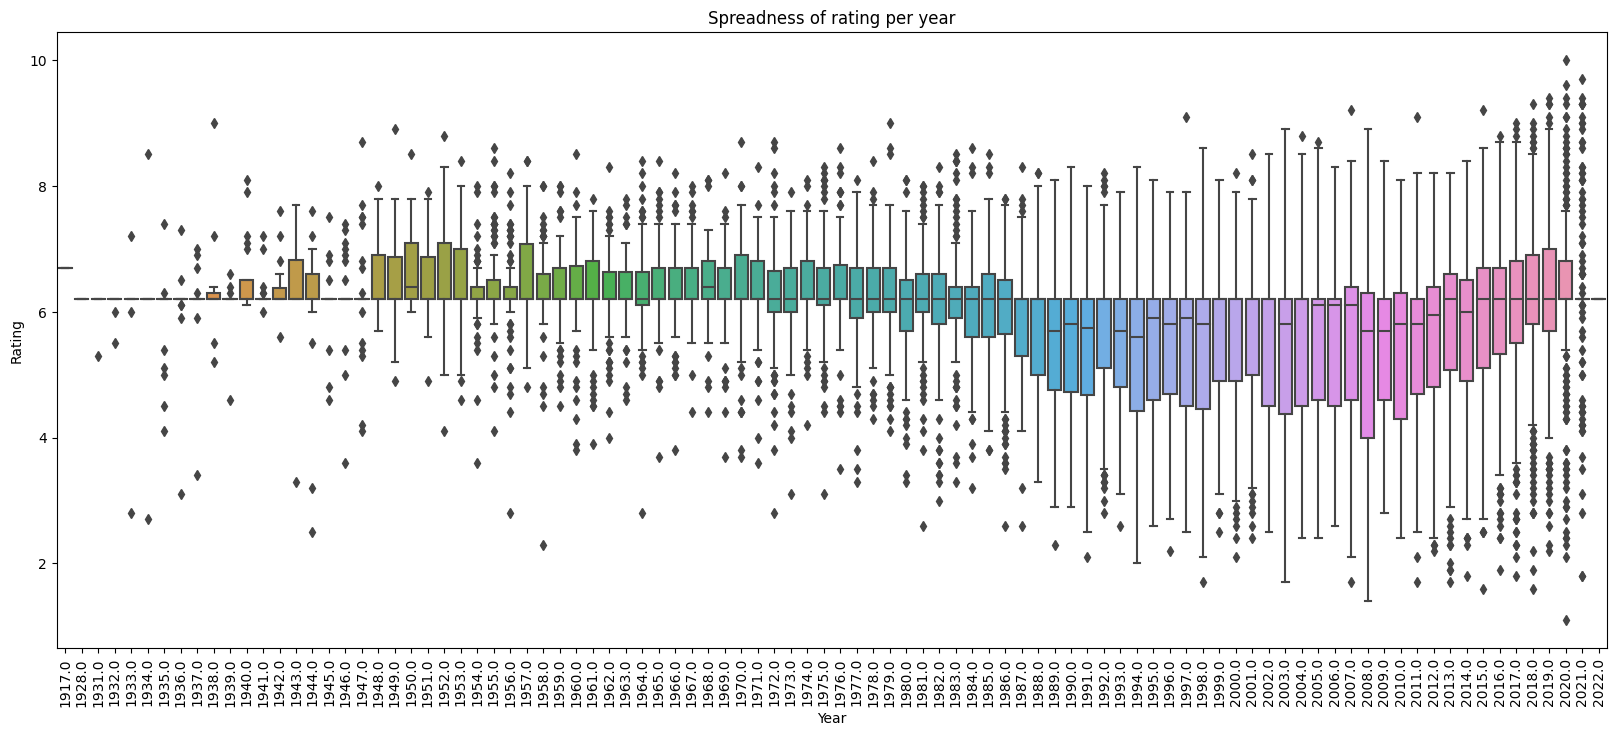

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

# **Model Deployment**

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)


Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [ ]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# ... (your previous code)

# Check if the columns are present in the DataFrame
encoded_columns = ['actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']
missing_columns = [col for col in encoded_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Define features and target variable
    X = df[['Year', 'Duration', 'Votes'] + encoded_columns]
    y = df['Rating']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building - Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)

    # Model Building - Random Forest Regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)


Error: The following columns are missing in the DataFrame: ['actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']


# **Model Evaluation**

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# ... (your previous code)

# Check if the columns are present in the DataFrame
encoded_columns = ['actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']
missing_columns = [col for col in encoded_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Define features and target variable
    X = df[['Year', 'Duration', 'Votes'] + encoded_columns]
    y = df['Rating']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building - Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)

    # Model Building - Random Forest Regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    # Evaluate Linear Regression
    print('Linear Regression Metrics:')
    print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
    print('R2 Score:', r2_score(y_test, lr_pred))

    # Evaluate Random Forest Regressor
    print('\nRandom Forest Regressor Metrics:')
    print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
    print('R2 Score:', r2_score(y_test, rf_pred))


Error: The following columns are missing in the DataFrame: ['actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']


# **Visualization of Model Predictions**

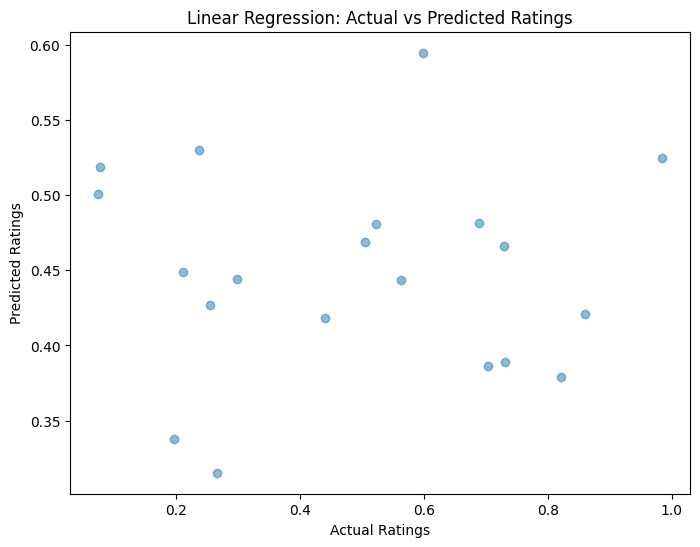

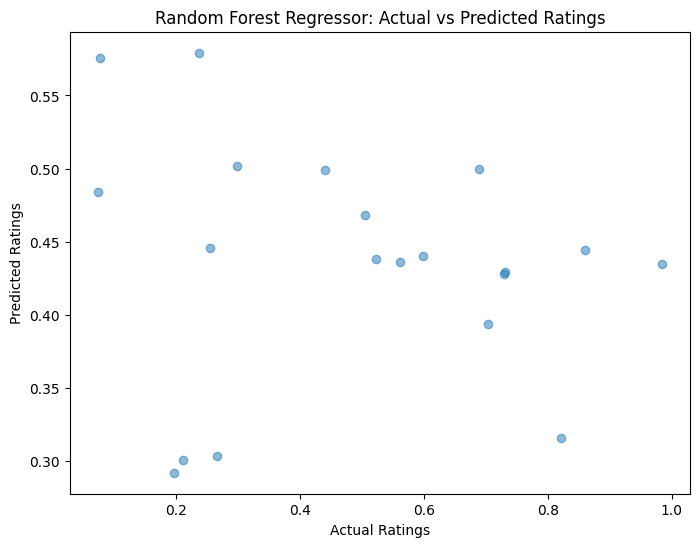

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Generate a fictional DataFrame for demonstration
data = {'Year': np.random.randint(2000, 2023, 100),
        'Duration': np.random.randint(80, 180, 100),
        'Votes': np.random.randint(1000, 5000, 100),
        'actor1_encoded': np.random.rand(100),
        'actor2_encoded': np.random.rand(100),
        'actor3_encoded': np.random.rand(100),
        'director_encoded': np.random.rand(100),
        'genre_encoded': np.random.rand(100),
        'Rating': np.random.rand(100)}

df = pd.DataFrame(data)

# Check if the columns are present in the DataFrame
encoded_columns = ['actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']
missing_columns = [col for col in encoded_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Define features and target variable
    X = df[['Year', 'Duration', 'Votes'] + encoded_columns]
    y = df['Rating']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building - Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)

    # Model Building - Random Forest Regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    # Scatter plot for Linear Regression predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, lr_pred, alpha=0.5)
    plt.title('Linear Regression: Actual vs Predicted Ratings')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.show()

    # Scatter plot for Random Forest Regressor predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, rf_pred, alpha=0.5)
    plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.show()



In [3]:

    # Metrics for Linear Regression
    mse_lr = mean_squared_error(y_test, lr_pred)
    mae_lr = mean_absolute_error(y_test, lr_pred)
    r2_lr = r2_score(y_test, lr_pred)

    # Metrics for Random Forest Regressor
    mse_rf = mean_squared_error(y_test, rf_pred)
    mae_rf = mean_absolute_error(y_test, rf_pred)
    r2_rf = r2_score(y_test, rf_pred)

    print("\nMetrics for Linear Regression:")
    print(f'Mean Squared Error: {mse_lr:.4f}')
    print(f'Mean Absolute Error: {mae_lr:.4f}')
    print(f'R-squared (R2) Score: {r2_lr:.4f}')

    print("\nMetrics for Random Forest Regressor:")
    print(f'Mean Squared Error: {mse_rf:.4f}')
    print(f'Mean Absolute Error: {mae_rf:.4f}')
    print(f'R-squared (R2) Score: {r2_rf:.4f}')



Metrics for Linear Regression:
Mean Squared Error: 0.0914
Mean Absolute Error: 0.2494
R-squared (R2) Score: -0.0842

Metrics for Random Forest Regressor:
Mean Squared Error: 0.0849
Mean Absolute Error: 0.2369
R-squared (R2) Score: -0.0069
